In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings("ignore")

## EXPLORATORY DATA ANALYSIS
________________________________________________________
### FORM ANALYSIS 
* Target identification => loas_status
*  Columns and row quantity => init(2.2m, 151), shrinked to (2.2m, 20)
* Variable types => float, object
* NaN values identification => after trimming a huge part of columns, the quantity of NaN values decreased, and it might be replaced by average/mean or median values

________________________________________________________

### BACKGROUND ANALYSIS
* Target visualisation => Fully Paid(1076751) and Charged Off(268559)
* Different variable comprehension => quantitatives: +/- standardized values => qualitatives: binarized values (1/0)
* Features identification and visualisation => see notes step-by-step
* Outliers identification => negligible quantity of outliers 


In [2]:
data = pd.read_csv("file_path",
                 compression='gzip',
                 low_memory=True)
df = data.copy()
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [4]:
col_names = df.columns.to_list()
col_names

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [5]:
#We only interested into 2 categories of loan payment status
target_loan = ["Fully Paid","Charged Off"]
df = df[df["loan_status"].isin(target_loan)]

#Dataset too heavy, we may drop columns where our missing value ratio is more than, let's say, 25%
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 25)].to_list()
len(features_to_keep)
#93 columns are still a lot
#https://github.com/dosei1/Lending-Club-Loan-Data/blob/master/LCDataDictionary.csv is where we may find the column definitions, and hence,
#we will get away with only 20 of them
trim=["addr_state","annual_inc","dti","emp_length","fico_range_high","fico_range_low",
     "grade","home_ownership","installment","int_rate","loan_amnt","loan_status","mort_acc",
     "open_acc","pub_rec_bankruptcies","purpose","revol_util","sub_grade","term","total_acc"]

In [6]:
dft = df[trim]
dft.head()

,addr_state,annual_inc,dti,emp_length,fico_range_high,fico_range_low,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,open_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,total_acc
0,PA,55000.0,5.91,10+ years,679.0,675.0,C,MORTGAGE,123.03,13.99,3600.0,Fully Paid,1.0,7.0,0.0,debt_consolidation,29.7,C4,36 months,13.0
1,SD,65000.0,16.06,10+ years,719.0,715.0,C,MORTGAGE,820.28,11.99,24700.0,Fully Paid,4.0,22.0,0.0,small_business,19.2,C1,36 months,38.0
2,IL,63000.0,10.78,10+ years,699.0,695.0,B,MORTGAGE,432.66,10.78,20000.0,Fully Paid,5.0,6.0,0.0,home_improvement,56.2,B4,60 months,18.0
4,PA,104433.0,25.37,3 years,699.0,695.0,F,MORTGAGE,289.91,22.45,10400.0,Fully Paid,6.0,12.0,0.0,major_purchase,64.5,F1,60 months,35.0
5,GA,34000.0,10.20,4 years,694.0,690.0,C,RENT,405.18,13.44,11950.0,Fully Paid,0.0,5.0,0.0,debt_consolidation,68.4,C3,36 months,6.0


In [7]:
interdict = {}
for i in list(dft.columns):
    interdict[i] = dft[i].value_counts().shape[0] 

more_info = pd.DataFrame(interdict,index=["unique value count"]).transpose().sort_values(by=["unique value count"], ascending=False)
more_info

,unique value count
installment,83307
annual_inc,64362
dti,7067
loan_amnt,1556
revol_util,1373
int_rate,654
total_acc,142
open_acc,84
addr_state,51
fico_range_low,40


In [8]:
#now, we may go for the same exploratory data analysis, with already trimmed data
print(dft.info())
dft.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   addr_state            1345310 non-null  object 
 1   annual_inc            1345310 non-null  float64
 2   dti                   1344936 non-null  float64
 3   emp_length            1266799 non-null  object 
 4   fico_range_high       1345310 non-null  float64
 5   fico_range_low        1345310 non-null  float64
 6   grade                 1345310 non-null  object 
 7   home_ownership        1345310 non-null  object 
 8   installment           1345310 non-null  float64
 9   int_rate              1345310 non-null  float64
 10  loan_amnt             1345310 non-null  float64
 11  loan_status           1345310 non-null  object 
 12  mort_acc              1298029 non-null  float64
 13  open_acc              1345310 non-null  float64
 14  pub_rec_bankruptcies  1344613 non-

,annual_inc,dti,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,mort_acc,open_acc,pub_rec_bankruptcies,revol_util,total_acc
count,1.345310e+06,1.344936e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.298029e+06,1.345310e+06,1.344613e+06,1.344453e+06,1.345310e+06
mean,7.624764e+04,1.828267e+01,7.001852e+02,6.961850e+02,4.380755e+02,1.323962e+01,1.441997e+04,1.670783e+00,1.159352e+01,1.344439e-01,5.181002e+01,2.498084e+01
std,6.992510e+04,1.116045e+01,3.185316e+01,3.185251e+01,2.615126e+02,4.768716e+00,8.717051e+03,2.000444e+00,5.473789e+00,3.779285e-01,2.452107e+01,1.199847e+01
min,0.000000e+00,-1.000000e+00,6.290000e+02,6.250000e+02,4.930000e+00,5.310000e+00,5.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,4.578000e+04,1.179000e+01,6.740000e+02,6.700000e+02,2.484800e+02,9.750000e+00,8.000000e+03,0.000000e+00,8.000000e+00,0.000000e+00,3.340000e+01,1.600000e+01
50%,6.500000e+04,1.761000e+01,6.940000e+02,6.900000e+02,3.754300e+02,1.274000e+01,1.200000e+04,1.000000e+00,1.100000e+01,0.000000e+00,5.220000e+01,2.300000e+01
75%,9.000000e+04,2.406000e+01,7.140000e+02,7.100000e+02,5.807300e+02,1.599000e+01,2.000000e+04,3.000000e+00,1.400000e+01,0.000000e+00,7.070000e+01,3.200000e+01
max,1.099920e+07,9.990000e+02,8.500000e+02,8.450000e+02,1.719830e+03,3.099000e+01,4.000000e+04,5.100000e+01,9.000000e+01,1.200000e+01,8.923000e+02,1.760000e+02


In [9]:
#dft['loan_status'].value_counts()
#sns.heatmap(df.isna(), cbar=False)

array([[<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'fico_range_high'}>],
       [<AxesSubplot:title={'center':'fico_range_low'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'int_rate'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'mort_acc'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec_bankruptcies'}>,
        <AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot:title={'center':'total_acc'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

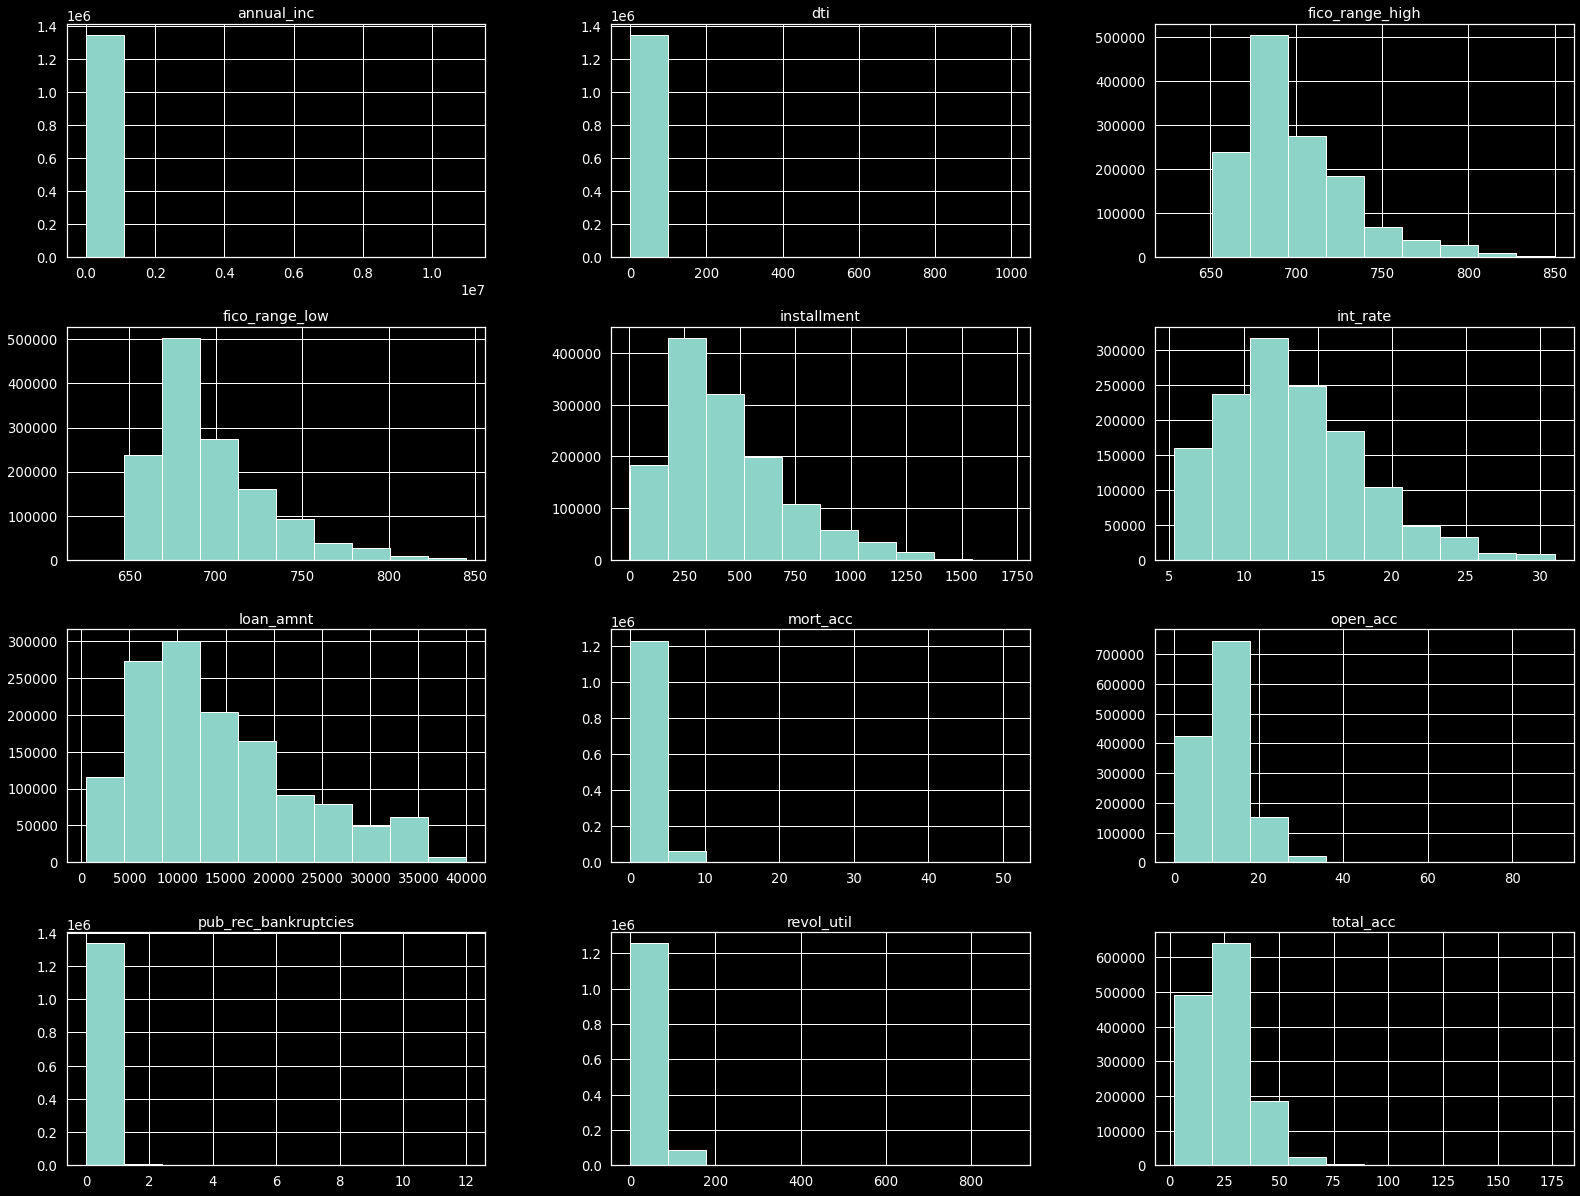

In [10]:
plt.figure()
dft.hist(figsize=(27, 21))

addr_state              0.000000
sub_grade               0.000000
purpose                 0.000000
open_acc                0.000000
loan_status             0.000000
loan_amnt               0.000000
term                    0.000000
installment             0.000000
int_rate                0.000000
grade                   0.000000
fico_range_low          0.000000
fico_range_high         0.000000
annual_inc              0.000000
home_ownership          0.000000
total_acc               0.000000
dti                     0.000278
pub_rec_bankruptcies    0.000518
revol_util              0.000637
mort_acc                0.035145
emp_length              0.058359
dtype: float64


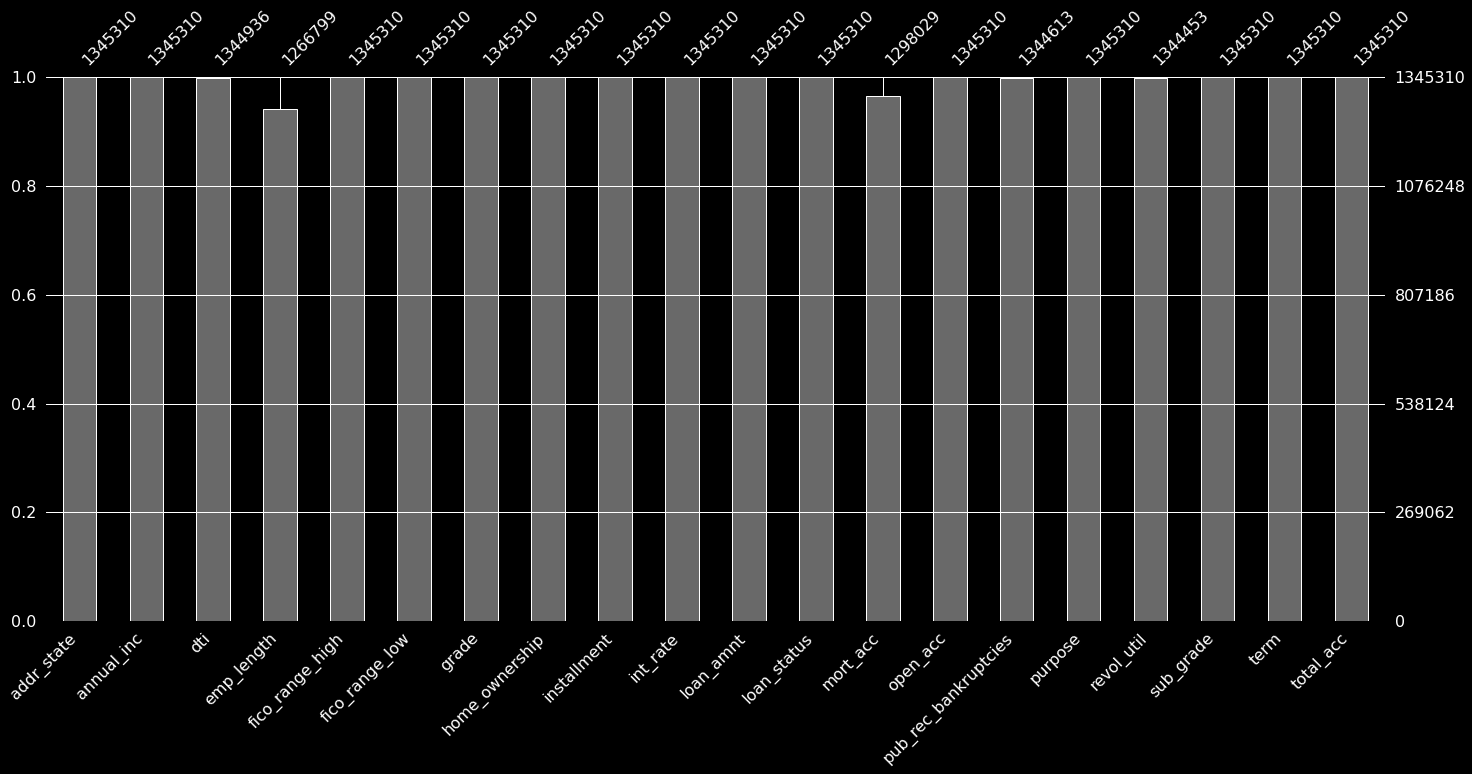

In [11]:
import missingno as msno

print((dft.isna().sum()/dft.shape[0]).sort_values())
#Not a lot of NaN values are present in the selected 20 columns 
ax=msno.bar(dft)

Text(0.5, 1.0, 'Loan status count')

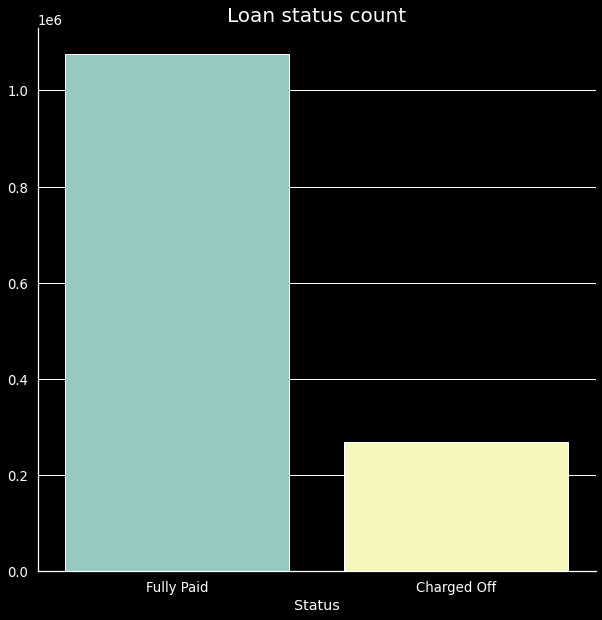

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.despine()
sns.countplot(data=dft,x="loan_status")
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

________________________________________________________
### Partial conclusion 

Severe inbalance in data, we won't rely on accuracy but more on Recall/Precision
________________________________________________________

Text(0.5, 1.0, 'Loan count by state')

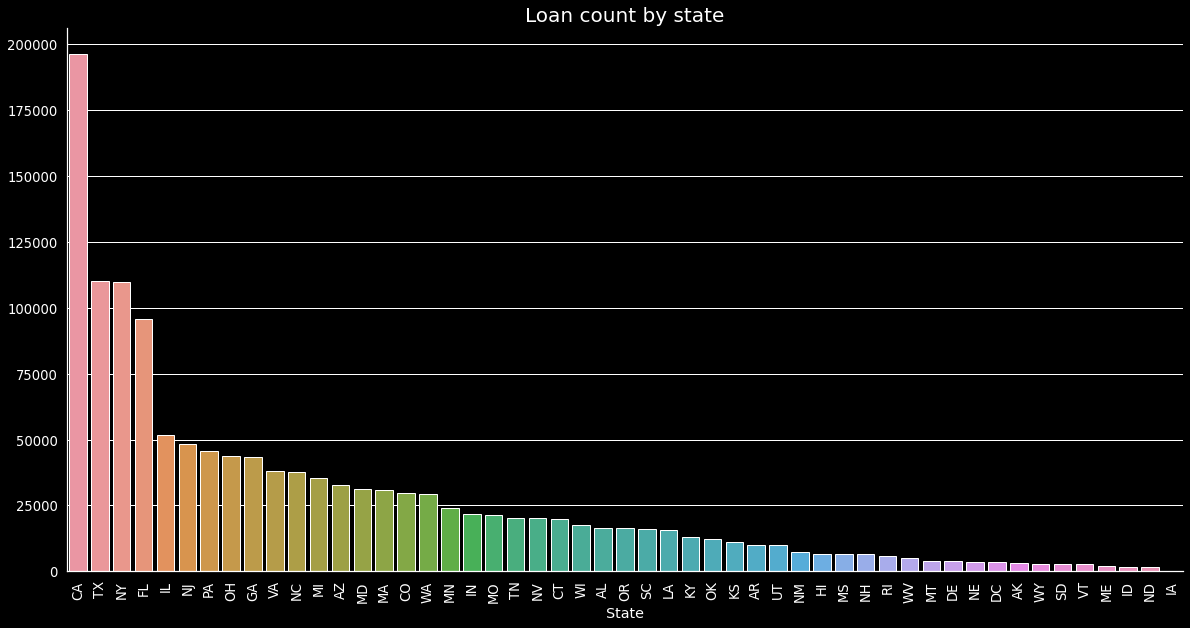

In [13]:
fig, ax =plt.subplots(figsize=(20,10))
sns.despine()
order = dft["addr_state"].value_counts().index
sns.countplot(data=dft,x="addr_state",order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='State', ylabel='')
ax.set_title('Loan count by state', size=20)

Text(0.5, 1.0, 'Employment length')

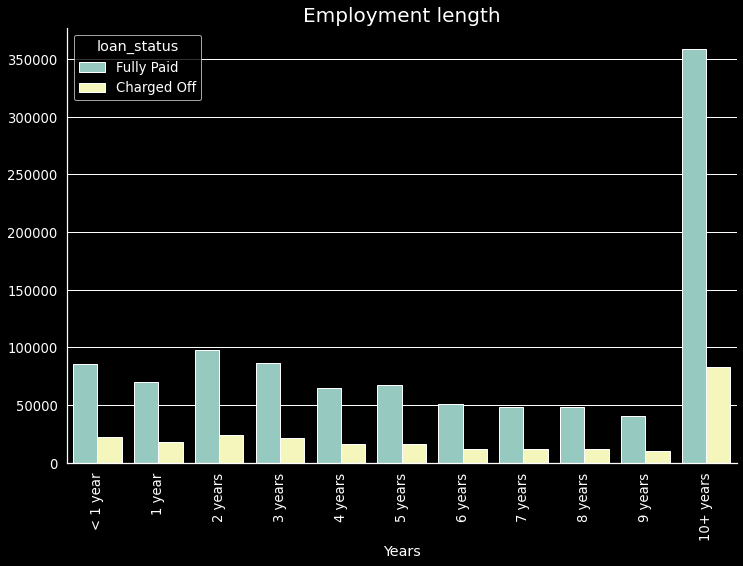

In [14]:
fig, ax =plt.subplots(figsize=(12,8)) 
sns.despine()
order=["< 1 year", "1 year","2 years", "3 years", "4 years", "5 years",
      "6 years", "7 years", "8 years", "9 years", "10+ years"]
sns.countplot(data=dft,x="emp_length",hue="loan_status",order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='Years', ylabel='')
ax.set_title('Employment length', size=20)

<AxesSubplot:title={'center':'Purpose of loan - Last values zoom-in'}, xlabel='purpose', ylabel='count'>

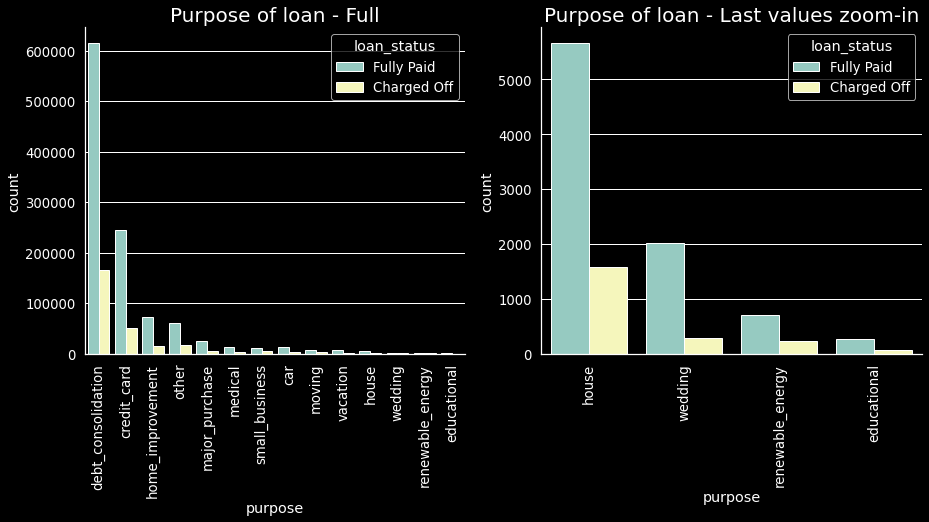

In [15]:
# Purpose of loan count by loan status
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.despine() 

ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set(xlabel='Purpose', ylabel='')
ax[0].set_title('Purpose of loan - Full', size=20)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set(xlabel='Purpose', ylabel='')
ax[1].set_title('Purpose of loan - Last values zoom-in', size=20)

sns.countplot(data=dft,x="purpose",hue="loan_status",
              order=dft["purpose"].value_counts().index,ax=ax[0])

sns.countplot(data=dft,x="purpose",hue="loan_status",
              order=["house","wedding","renewable_energy",
                    "educational"],ax=ax[1])

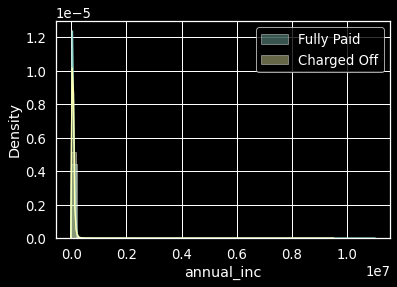

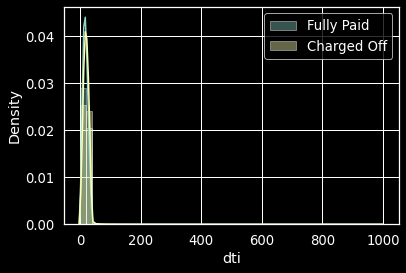

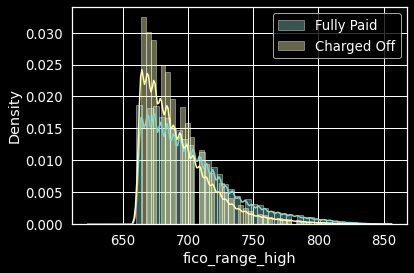

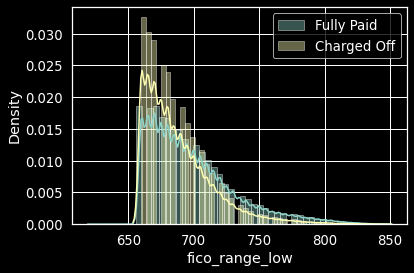

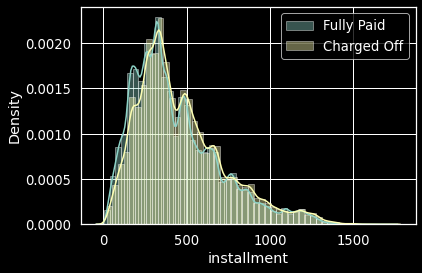

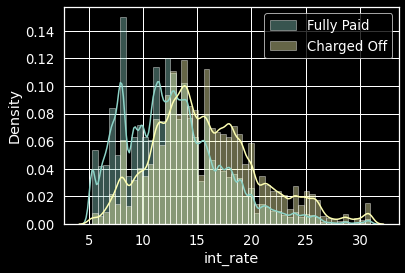

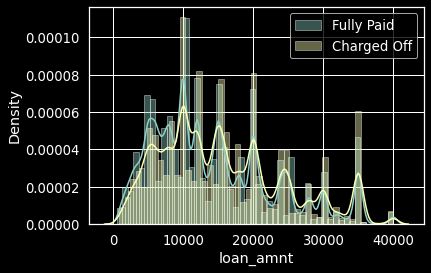

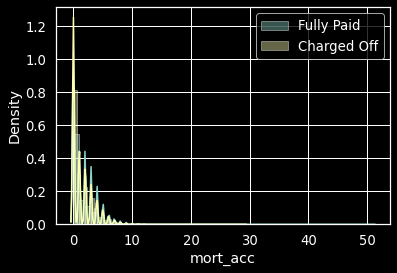

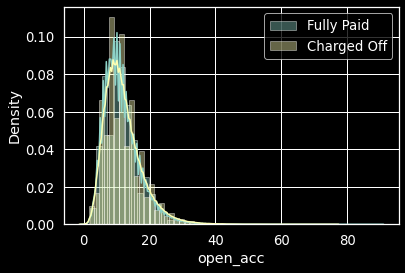

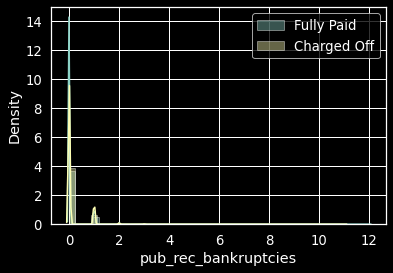

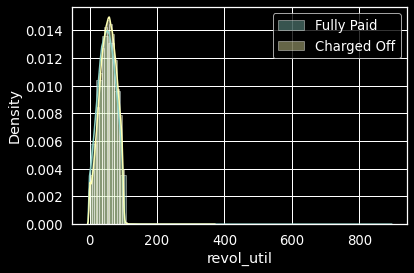

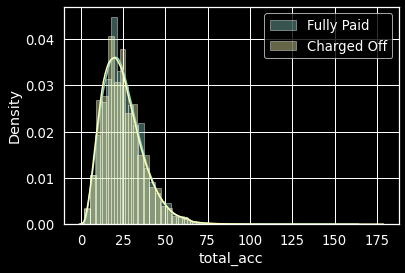

In [16]:
#to ease the process
fully_paid_dft = dft[dft['loan_status'] == 'Fully Paid']
charged_off_dft = dft[dft['loan_status'] == 'Charged Off']
numeric_data = ['annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'installment', 'int_rate', 'loan_amnt',
                'mort_acc', 'open_acc', 'pub_rec_bankruptcies', 'revol_util', 'total_acc']
for i in numeric_data:
    plt.figure()
    sns.distplot(fully_paid_dft[i], label='Fully Paid')
    sns.distplot(charged_off_dft[i], label='Charged Off')
    plt.legend()
    

#for the histograms below, positive and negative courbes seem to be the same, EXCEPT int_rate

Lets actually get back and talk about missing values.
After the observations, we may deduce that the NaN values may be replaced by most_frequent(categ) or by mean(quant) values
for the columns where we had more than 3% of missing values

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

imp_mort = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_emp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 

dft["mort_acc"]=imp_mort.fit_transform(dft[["mort_acc"]])
dft["emp_length"]=imp_emp.fit_transform(dft[["emp_length"]])
dft = dft.dropna()
dft

,addr_state,annual_inc,dti,emp_length,fico_range_high,fico_range_low,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,open_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,total_acc
0,PA,55000.0,5.91,10+ years,679.0,675.0,C,MORTGAGE,123.03,13.99,3600.0,Fully Paid,1.0,7.0,0.0,debt_consolidation,29.7,C4,36 months,13.0
1,SD,65000.0,16.06,10+ years,719.0,715.0,C,MORTGAGE,820.28,11.99,24700.0,Fully Paid,4.0,22.0,0.0,small_business,19.2,C1,36 months,38.0
2,IL,63000.0,10.78,10+ years,699.0,695.0,B,MORTGAGE,432.66,10.78,20000.0,Fully Paid,5.0,6.0,0.0,home_improvement,56.2,B4,60 months,18.0
4,PA,104433.0,25.37,3 years,699.0,695.0,F,MORTGAGE,289.91,22.45,10400.0,Fully Paid,6.0,12.0,0.0,major_purchase,64.5,F1,60 months,35.0
5,GA,34000.0,10.20,4 years,694.0,690.0,C,RENT,405.18,13.44,11950.0,Fully Paid,0.0,5.0,0.0,debt_consolidation,68.4,C3,36 months,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,TX,130000.0,20.59,5 years,739.0,735.0,B,OWN,377.95,9.49,18000.0,Fully Paid,3.0,17.0,0.0,home_improvement,34.0,B2,60 months,39.0
2260690,CA,180792.0,22.03,9 years,709.0,705.0,C,MORTGAGE,683.94,13.99,29400.0,Fully Paid,3.0,16.0,0.0,debt_consolidation,85.2,C3,60 months,32.0
2260691,AZ,157000.0,10.34,3 years,739.0,735.0,C,MORTGAGE,752.74,14.49,32000.0,Charged Off,3.0,14.0,0.0,home_improvement,27.4,C4,60 months,18.0
2260692,NC,150000.0,12.25,10+ years,669.0,665.0,C,RENT,362.34,12.79,16000.0,Fully Paid,0.0,12.0,3.0,medical,55.0,C1,60 months,28.0


In [18]:
print((dft.isna().sum()/dft.shape[0]).sort_values())
#And now that we have no missing values, we can proceed to the Feature Selection
dict = {}
for i in list(dft.columns):
    dict[i] = (dft[i].isnull().sum(),round(dft[i].isnull().sum()/len(dft)*100,2))

pd.DataFrame(dict,index=["# of missing values","% of missing values"]).transpose().sort_values(by=["# of missing values"], ascending=False)

addr_state              0.0
sub_grade               0.0
revol_util              0.0
purpose                 0.0
pub_rec_bankruptcies    0.0
open_acc                0.0
mort_acc                0.0
loan_status             0.0
loan_amnt               0.0
int_rate                0.0
installment             0.0
home_ownership          0.0
grade                   0.0
fico_range_low          0.0
fico_range_high         0.0
emp_length              0.0
dti                     0.0
annual_inc              0.0
term                    0.0
total_acc               0.0
dtype: float64


,# of missing values,% of missing values
addr_state,0.0,0.0
annual_inc,0.0,0.0
term,0.0,0.0
sub_grade,0.0,0.0
revol_util,0.0,0.0
purpose,0.0,0.0
pub_rec_bankruptcies,0.0,0.0
open_acc,0.0,0.0
mort_acc,0.0,0.0
loan_status,0.0,0.0


__________________________
## Feature Selection
### Numeric values
__________________________

In [19]:
#It would be interesting if we see the variance of charge off status for every variable

per_charge_off = {}
for i in list(dft.columns):
    ratio = dft[dft['loan_status'] == 'Charged Off'][i].value_counts() / dft[dft['loan_status'] == 'Fully Paid'][i].value_counts()
    per_charge_off[i] = f"{ratio.var():.4f}"
per_charge_off
#and it seems like the employment age has no effect, and hence we can drop it (see the drop func at the end)

{'addr_state': '0.0034',
 'annual_inc': '0.2421',
 'dti': '0.1392',
 'emp_length': '0.0000',
 'fico_range_high': '0.0085',
 'fico_range_low': '0.0085',
 'grade': '0.1208',
 'home_ownership': '0.0017',
 'installment': '0.3157',
 'int_rate': '0.1211',
 'loan_amnt': '0.0311',
 'loan_status': 'nan',
 'mort_acc': '0.2872',
 'open_acc': '0.0663',
 'pub_rec_bankruptcies': '0.0279',
 'purpose': '0.0048',
 'revol_util': '0.0448',
 'sub_grade': '0.1181',
 'term': '0.0421',
 'total_acc': '0.0517'}

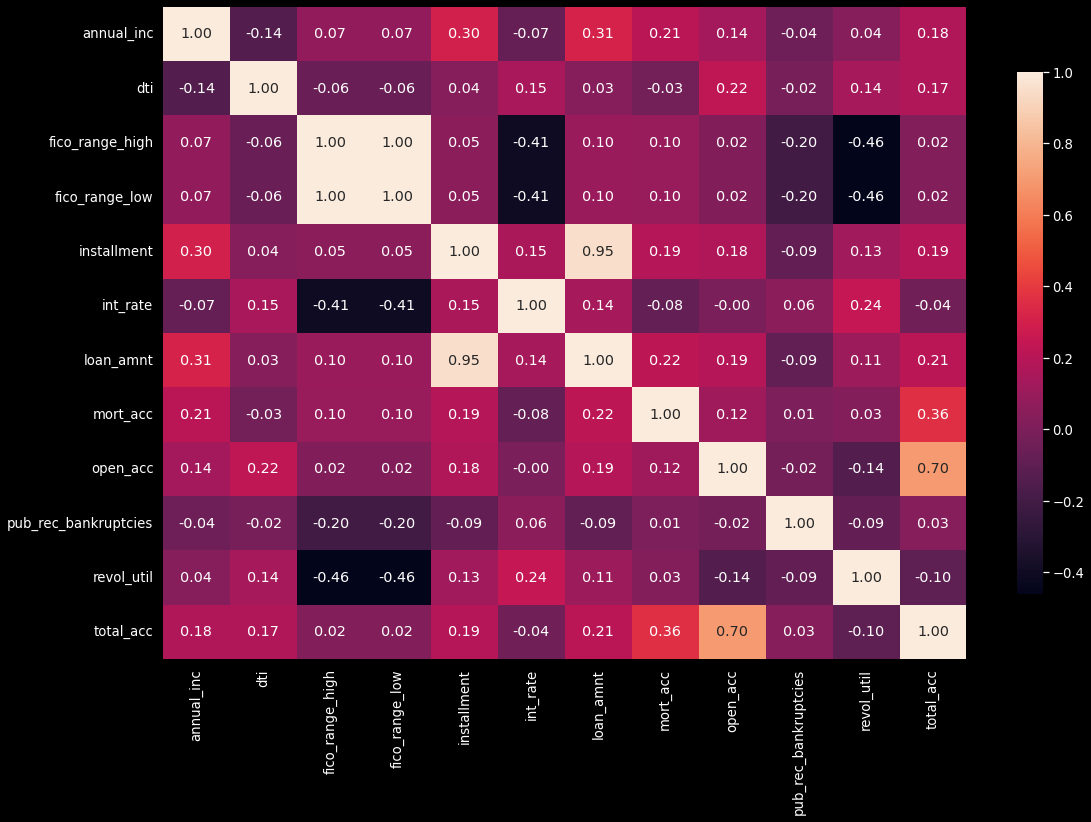

In [20]:
#The same way, we might look at the correlations between all numeric values
plt.figure(figsize=(18, 12))
sns.heatmap(dft.corr(), annot=True, fmt=".2f",cbar_kws={"shrink": .8})
#hence, fico_range_low.high are highly correlated, which is obvious, so we may shrink the dataframe by introducing fico_avg and dropping
#fico_range_low, fico range_high
#with the same reasonment, we may drop loan_amnt as it is correlated to the installement sum
dft['fico_range_avg'] = (dft["fico_range_high"]+dft["fico_range_low"])/2
dft = dft.drop(["fico_range_high","fico_range_low","loan_amnt", "emp_length"],axis=1)

In [21]:
#another useful tool to utilize
#Proceeding to evaluate variance for each of our selected feature. We will drop those columns that are 85% or more similar.
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder

check=dft.copy()
check.fillna("None")
check = check.drop('loan_status', axis=1)
ord_enc = OrdinalEncoder()
check[["addr_state","home_ownership","purpose","sub_grade","grade","term"]] = ord_enc.fit_transform(check[["addr_state","home_ownership", "purpose","sub_grade","grade","term"]])
var_thr = VarianceThreshold(threshold = 0.15)  #Dropping columns that are 85% or more similar
var_thr.fit(check)
var_thr.get_support()
var_resp = {key: value for key, value in zip(list(check.columns), list(var_thr.get_support()))}
var_resp
#So pub_rec_bankrupcies seems not to vary a lot, and hence it will be rejected from our dataframe
dft = dft.drop('pub_rec_bankruptcies', axis=1)

__________________________
### Categorical values
__________________________

In [22]:
pip install association_metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association_metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3954 sha256=502f28fa4ce544ae9c2fd7e8ab2bf88e99df28d29109c69e8d322e776d79bc1d
  Stored in directory: /root/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association_metrics
Note: you may need to restart the kernel to use updated packages.


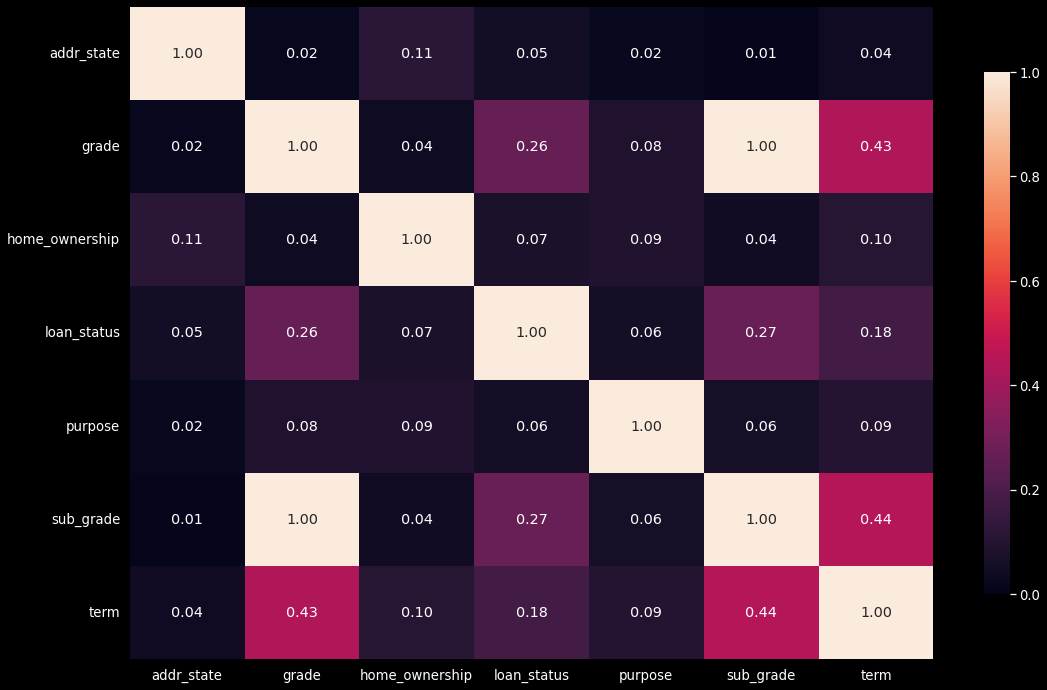

In [23]:
import association_metrics as am

categorical_data = dft.select_dtypes(include=['object']).columns
categorical_data

dfc = dft[categorical_data]
dfc = dfc.apply(lambda x: x.astype("category") if x.dtype == "O" else x)

plt.figure(figsize=(18, 12))
cramersv = am.CramersV(dfc) 
corr=cramersv.fit()
sns.heatmap(corr, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)
#as we could imagine, grade and subgrade are strictly correlated
#and sub_grade contains more information than grade, which means we will drop the column 'grade'
dft = dft.drop('grade', axis = 1)

In [25]:
print(dft.columns)
#So we are left with 15 features out of 151 that we had initially to work with

Index(['addr_state', 'annual_inc', 'dti', 'home_ownership', 'installment',
       'int_rate', 'loan_status', 'mort_acc', 'open_acc', 'purpose',
       'revol_util', 'sub_grade', 'term', 'total_acc', 'fico_range_avg'],
      dtype='object')


--------
## Preprocessing
--------

In [26]:
y = dft["loan_status"]
X = dft.drop(['loan_status'],axis=1)

OneHotted = pd.get_dummies(X[['addr_state',  'home_ownership', 'purpose', 'sub_grade','term']], drop_first=True)
X=X.drop(['addr_state', 'home_ownership', 'purpose', 'sub_grade','term'],axis=1)

X = pd.concat([X,OneHotted],axis=1)
X.columns

Index(['annual_inc', 'dti', 'installment', 'int_rate', 'mort_acc', 'open_acc',
       'revol_util', 'total_acc', 'fico_range_avg', 'addr_state_AL',
       ...
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'term_ 60 months'],
      dtype='object', length=112)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=33)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(1074706, 112)

________________
## EDA Conclusion
________________
In this part, we did decent and complete exploratory data analysis, preprocessing, feature selection and train_test_split
However, due to RAM restrictions, we must split the modelling part in another Jupyter sheet.